<a href="https://colab.research.google.com/github/astrobatty/polyfitter/blob/master/examples/run_polyfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### If you are in Google Colab, first install the package

In [ ]:
!git clone https://github.com/astrobatty/polyfitter+git; cd ./polyfitter; python setup.py install

# This example shows how to run Polyfitter interactively

In [1]:
from polyfitter import Polyfitter

import matplotlib.pyplot as plt
import numpy as np

## Polynomial chain fit to OGLE-BLG-ECL-040474

In [2]:
# Parameters from OGLE database
ID = 'OGLE-BLG-ECL-040474'
P=1.8995918
t0=7000.90650

# Load light curve from OGLE database
# This is in magnitude scale
path_to_ogle = 'http://ogledb.astrouw.edu.pl/~ogle/OCVS/data/I/'+ID[-2:]+'/'+ID+'.dat'
lc = np.loadtxt(path_to_ogle).T

# For clarity
time = lc[0]
mag  = lc[1]
err  = lc[2]

# Create Polyfitter instance by setting the brightness scale of your data
# Set "mag" or "flux" scale
pf = Polyfitter(scale='mag')

# Run polynomial chain fitting
t0new, phase, polyfit, messages = pf.get_polyfit(time,mag,err,P,t0)

# Note: if you want to fit silently set verbosity (e.g. inside a for loop)
# t0new, phase, polyfit, messages = pf.get_polyfit(time,mag,err,P,t0,verbose=0)

Fitting polyfits...
Comparing polyfit models...
Fitting polyfits...
Comparing polyfit models...
Fitting polyfits...
Comparing polyfit models...


#### Plot phase curve and polyfit

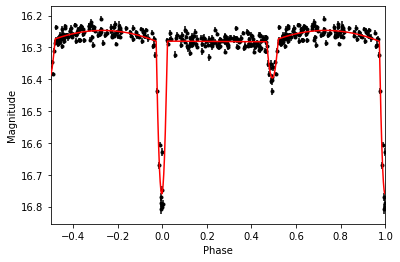

In [3]:
plt.errorbar((time-t0new)/P%1,mag,err,fmt='k.')
plt.errorbar((time-t0new)/P%1-1,mag,err,fmt='k.')
plt.plot(phase,polyfit,c='r',zorder=10)
plt.plot(phase+1,polyfit,c='r',zorder=10)
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.xlim(-0.5,1)
plt.gca().invert_yaxis()
plt.show()

#### Get morphology classification

In [4]:
morp_array = pf.c
print('Morphology type =' , morp_array[0] )

Morphology type = 0.4207379453872869


#### Check original and new epochs

In [5]:
print('Original epoch: {} -> new epoch: {}'.format(t0,t0new) )

Original epoch: 7000.9065 -> new epoch: 7000.9065


#### Messages that would be printed out by the original polyfit code are stored in a list

In [6]:
messages

['# Fitting polynomial order: 2',
 '# Initial set of knots: {-0.480188, -0.026915, 0.023068, 0.468511}',
 '# Number of iterations for knot search: 4000',
 '# Step size for knot search: 0.009997',
 '# ',
 '# Original chi2: 1.086492e-03',
 '# Chi2med=0.004729 chi2MAD=0.004509 Threshold=-0.017816',
 '# Final chi2:    1.086492e-03',
 '# Phase space partitioning:',
 '# ',
 '#   interval  0: [-0.480, -0.027), 114 data points',
 '#   interval  1: [-0.027,  0.023),  11 data points',
 '#   interval  2: [ 0.023,  0.469), 125 data points',
 '#   interval  3: [ 0.469, -0.480),  13 data points',
 '# ',
 '# Weighted least-squares solution of the polyfit:',
 '# ',
 '#    knot\t\t   c[0]\t\t   c[1]\t\t   c[2]\t\t',
 '# -0.480187616125\t 16.270573781946\t 0.251831720218\t-0.590564369262\t',
 '# -0.026915477573\t 16.263387308844\t-38.354216649380\t 767.514532070894\t',
 '#  0.023068105259\t 16.263832639532\t-0.005979450050\t 0.003592801489\t',
 '#  0.468510753229\t 16.261882018096\t 0.169424709128\t 179

## Assuming that you have two (or more) polyfits generated earlier

To classify them the fits must have 1000 equidistant points.

Then the fits can be converted to a numpy ndarray with shape of (n fits,1000):

In [7]:
multiple_polyfits = np.vstack((polyfit,polyfit))

multiple_polyfits.shape

(2, 1000)

and the morphology classes will be returned as an array:

In [8]:
pf.get_c( multiple_polyfits )

array([0.42073795, 0.42073795])

## Polynomial chain fit to KIC 10417986 from the Kepler catalog

In [9]:
# Load light curve
KIC = '10417986'
lc = np.loadtxt('http://keplerebs.villanova.edu/data/?k='+KIC+'.00&cadence=lc&data=data')

# Parameters from the Kepler catalog
P  = 0.0737309
t0 = 55000.027476

# To decrease running time
# only the first 2000 measurements are used
time = lc[:2000,0]
flux = lc[:2000,6]
err  = lc[:2000,3]

# Create Polyfitter instance by setting the brightness scale to flux!
pf = Polyfitter(scale='flux')

# Run polynomial chain fitting
# To prevent the fitter from timing out
# the maximum waiting time is set to 10,000 seconds
t0new, phase, polyfit, messages = pf.get_polyfit(time,flux,err,P,t0,timeout=10000)

Fitting polyfits...
Comparing polyfit models...


#### Plot phase curve and polyfit

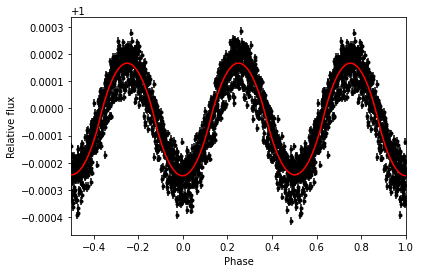

In [10]:
plt.errorbar((time-t0new)/P%1,flux,err,fmt='k.')
plt.errorbar((time-t0new)/P%1-1,flux,err,fmt='k.')
plt.plot(phase,polyfit,c='r',zorder=10)
plt.plot(phase+1,polyfit,c='r',zorder=10)
plt.xlabel('Phase')
plt.ylabel('Relative flux')
plt.xlim(-0.5,1)
plt.show()

#### Get morphology classification

In [11]:
morp_array = pf.c
print('Morphology type =' , morp_array[0] )

Morphology type = 0.9786215313817448


#### Check original and new epochs

In [12]:
print('Original epoch: {} -> new epoch: {}'.format(t0,t0new) )

Original epoch: 55000.027476 -> new epoch: 55000.027476


#### Messages that would be printed out by the original polyfit code are stored in a list

In [13]:
messages

['# Fitting polynomial order: 2',
 '# Initial set of knots: {-0.400000, -0.100000, 0.100000, 0.400000}',
 '# Number of iterations for knot search: 4000',
 '# Step size for knot search: 0.040000',
 '# ',
 '# Original chi2: 7.928298e-11',
 '# Chi2med=0.000000 chi2MAD=0.000000 Threshold=0.000000',
 '# Final chi2:    7.840777e-11',
 '# Phase space partitioning:',
 '# ',
 '#   interval  0: [-0.382, -0.117), 533 data points',
 '#   interval  1: [-0.117,  0.122), 476 data points',
 '#   interval  2: [ 0.122,  0.381), 518 data points',
 '#   interval  3: [ 0.381, -0.382), 473 data points',
 '# ',
 '# Weighted least-squares solution of the polyfit:',
 '# ',
 '#    knot\t\t   c[0]\t\t   c[1]\t\t   c[2]\t\t',
 '# -0.381917688046\t 0.999927405462\t 0.003602584836\t-0.013560634668\t',
 '# -0.116728590000\t 0.999929116557\t-0.003064890826\t 0.013270729966\t',
 '#  0.121979149077\t 0.999953687967\t 0.003343467337\t-0.013110029909\t',
 '#  0.380663126167\t 0.999941300279\t-0.000058524409\t 0.012677486